In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df= pd.read_csv(r'D:\data science\set\train5.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
x=df.iloc[:,1:3]
y=df.iloc[:,0]

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

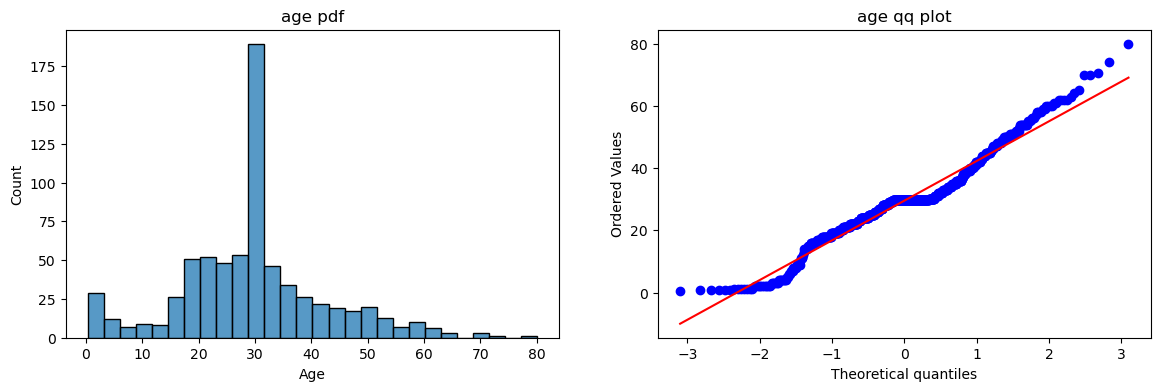

In [9]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(x_train['Age'])
plt.title("age pdf")

plt.subplot(122)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('age qq plot')
plt.show()

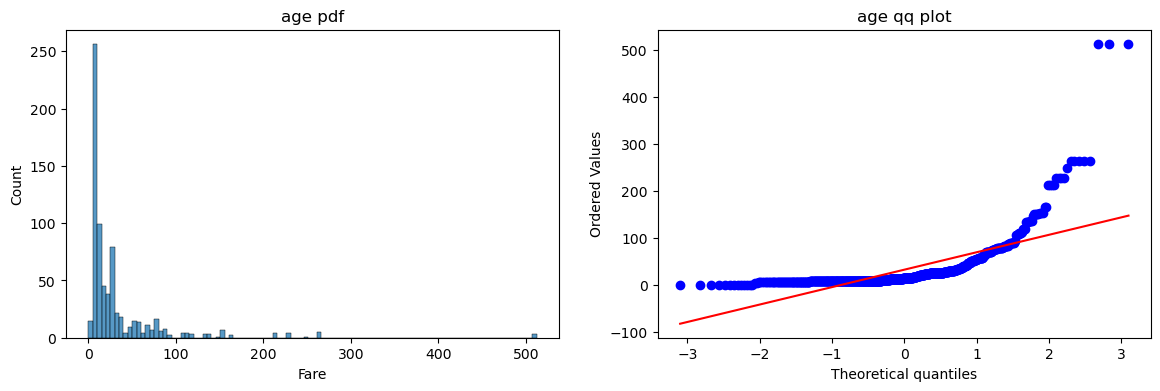

In [10]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(x_train['Fare'])
plt.title("age pdf")

plt.subplot(122)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('age qq plot')
plt.show()

In [11]:
clf=LogisticRegression()
clf2=DecisionTreeRegressor()

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier  # Example classifier, choose the appropriate one for your problem

# Assuming you have already split your data into x_train, x_test, y_train, y_test

# Train your classifiers
clf = LogisticRegression()  # Example classifier, choose the appropriate one for your problem
clf2 = DecisionTreeClassifier()  # Example classifier, choose the appropriate one for your problem
clf.fit(x_train, y_train)
clf2.fit(x_train, y_train)

# Make predictions
y_pred = clf.predict(x_test)
y_pred1 = clf2.predict(x_test)

# Check the accuracy
print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test, y_pred1))


Accuracy LR 0.6480446927374302
Accuracy DT 0.6815642458100558


In [13]:
trf = FunctionTransformer(func=np.log1p)

In [14]:
x_train_transform=trf.fit_transform(x_train)
x_test_transform=trf.transform(x_test)

In [15]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transform,y_train)
clf2.fit(x_train_transform,y_train)

y_pred=clf.predict(x_test_transform)
y_pred1=clf2.predict(x_test_transform)

print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test, y_pred1))


Accuracy LR 0.6815642458100558
Accuracy DT 0.6759776536312849


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Assuming you have already loaded your data into x and y

# Apply feature scaling if needed (e.g., StandardScaler)
scaler = StandardScaler()
x_transformed = scaler.fit_transform(x)

# Create instances of classifiers
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

# Perform cross-validation and calculate mean accuracy
print("LR", np.mean(cross_val_score(clf, x_transformed, y, scoring='accuracy', cv=10)))
print("DT", np.mean(cross_val_score(clf2, x_transformed, y, scoring='accuracy', cv=10)))


LR 0.6589013732833957
DT 0.6532334581772783


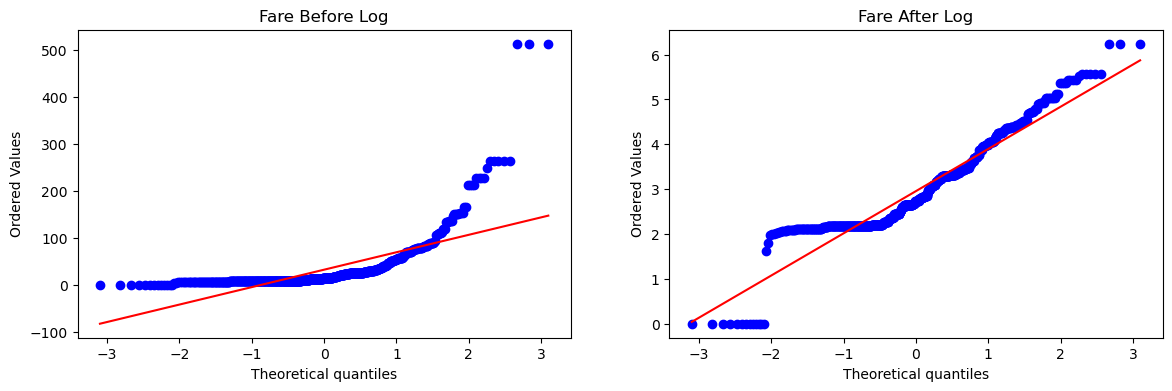

In [17]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(x_train_transform['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

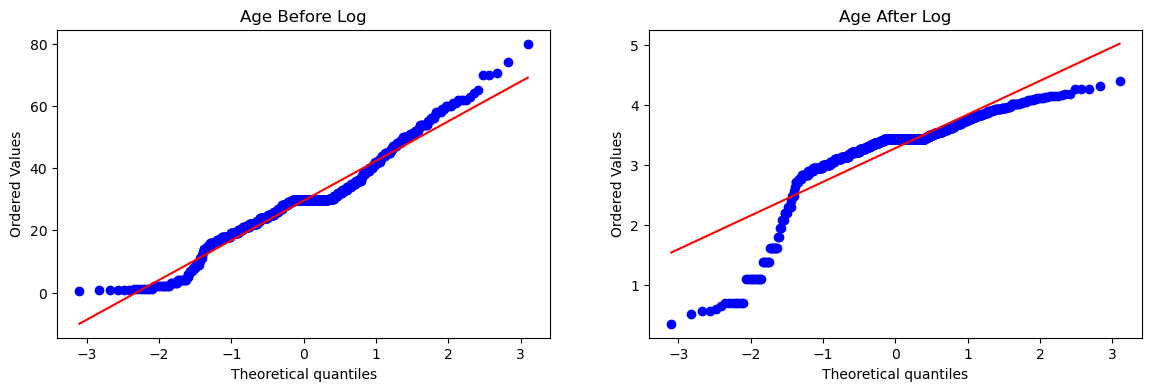

In [18]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(x_train_transform['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()  

In [19]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

x_train_transformed2 = trf2.fit_transform(x_train)
x_test_transformed2 = trf2.transform(x_test)

In [20]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed2,y_train)
clf2.fit(x_train_transformed2,y_train)
    
y_pred = clf.predict(x_test_transformed2)
y_pred2 = clf2.predict(x_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6759776536312849


In [21]:
x_transformed2 = trf2.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,x_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6577028714107366


In [22]:
def apply_transform(transform):
    x = df.iloc[:,1:3]
    x = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    x_trans = trf.fit_transform(x)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,x_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(x['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(x_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

In [23]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from scipy import stats

def apply_transform(transform):
    # Assuming 'df' is a DataFrame containing your data
    x = df.iloc[:, 1:3]  # Selecting columns 1 and 2
    y = df.iloc[:, 0]  # Assuming this is your target variable

    trf = ColumnTransformer([('log', FunctionTransformer(transform), ['Fare'])], remainder='passthrough')

    x_trans = trf.fit_transform(x)

    clf = LogisticRegression()

    print("Accuracy", np.mean(cross_val_score(clf, x_trans, y, scoring='accuracy', cv=10)))

    plt.figure(figsize=(14, 4))

    plt.subplot(121)
    stats.probplot(x['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(x_trans[:, 0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()


Accuracy 0.6195131086142323


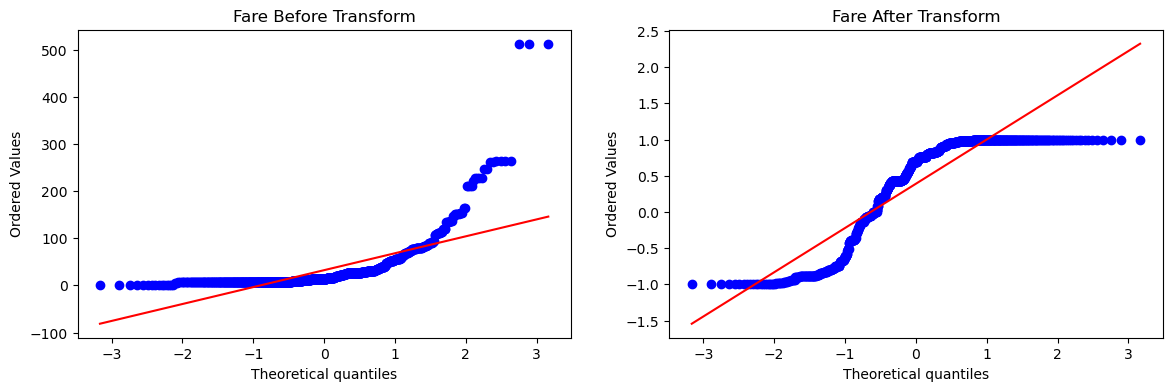

In [24]:
apply_transform(np.sin)